In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [112]:
filename = 'results_evaluation_genus_40_40.csv'

df = pd.read_csv('../ResultsEvaluation/all_250000/'+filename, sep='\t')
df

,Classifier,tp,fp,fn,ok,no,(tp+fp+fn+ok+no),sens,prec,f1,pearson
0,all_250000_2.fq_MP.V1.res,2792367,11478,283358,37797,0,3125000,0.893557,0.995906,0.941960,0.966200
1,all_250000_2.fq_MP.V2.res,2824389,11519,251296,37796,0,3125000,0.903804,0.995938,0.947637,0.968651
2,all_250000_2.fq_MPZ.V1.res,2951826,75828,59064,38282,0,3125000,0.944584,0.974955,0.959529,0.986130
3,all_250000_2.fq_MPZ.V2.res,3021908,21769,42641,38682,0,3125000,0.967011,0.992848,0.979759,0.996543
4,all_250000_2.fq_MT.V1.res,2719167,32625,333318,39890,0,3125000,0.870133,0.988144,0.925392,0.953882
5,all_250000_2.fq_MT.V2.res,2788631,31977,271041,33351,0,3125000,0.892362,0.988663,0.938047,0.975271
6,all_250000_2.fq_MTZ.V1.res,2927239,98025,59064,40672,0,3125000,0.936716,0.967598,0.951907,0.985269
7,all_250000_2.fq_MTZ.V2.res,3004637,43366,42641,34356,0,3125000,0.961484,0.985772,0.973477,0.996889
8,strex_centrifuge_250000.res,2729742,18004,345022,32232,0,3125000,0.873517,0.993448,0.929631,0.966820
9,strex_centrifuge_25000_SP.res,2799176,21025,272416,32383,0,3125000,0.895736,0.992545,0.941659,0.968547


In [113]:
def ReacllPlot(df):
    
    classificators = ['centrifuge','clark_genus','kraken2','kraken1']
    fig, ax = plt.subplots(figsize=(20,10))
    
    ## centrifuge
    new_df = df[df["Classifier"].str.contains(classificators[0])]

    y = new_df['sens']
    x = np.arange(len(classificators))  # the label locations
    width = 0.50  # the width of the bars
    

    y=[]
    y_sp = []
    y_spz = []
    y_st = []
    y_stz = []
    
    for name in classificators:
        new_df = df[df["Classifier"].str.contains(name)]
    
        label = []
        for i in range (0,5):
            if 'SPZ' in new_df['Classifier'].values[i]:
                label.append('SPZ')
                y_spz.append(new_df['sens'].values[i])
            elif 'SP' in new_df['Classifier'].values[i]:
                label.append('SP')
                y_sp.append(new_df['sens'].values[i])

            elif 'STZ' in new_df['Classifier'].values[i]:
                label.append('STZ')
                y_stz.append(new_df['sens'].values[i])
            elif 'ST' in new_df['Classifier'].values[i]:
                label.append('ST')
                y_st.append(new_df['sens'].values[i])
            else:
                label.append(name)
                y.append(new_df['sens'].values[i])
    
      ##colors
    #C1CF79   verde 
    #C57673   marroncino
    #B375CC   viola
    #7797CD   blue
    #87CE9B   verde acceso
    
    plt.bar(x - 2.25*width/5, y, width/5, label='Not reassigned', color='#C1CF79')
    plt.bar(x - 1.25*width/5, y_sp, width/5, label='Single Partial', color='#C57673')
    plt.bar(x - 0.25*width/5, y_spz, width/5, label='Single Partial Zero', color='#B375CC')
    plt.bar(x + 0.75*width/5, y_st, width/5, label='Single Total', color='#7797CD')
    plt.bar(x + 1.75*width/5, y_stz, width/5, label='Single Total Zero', color='#87CE9B')

     # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.ylabel('Recall')
    # plt.title('Scores by group and gender')
    plt.xticks(x)
    ax.set_xticklabels(classificators)
    plt.legend(loc='upper center')
    plt.grid(True)

    plt.savefig('recall-only-genus')
    plt.show()
    

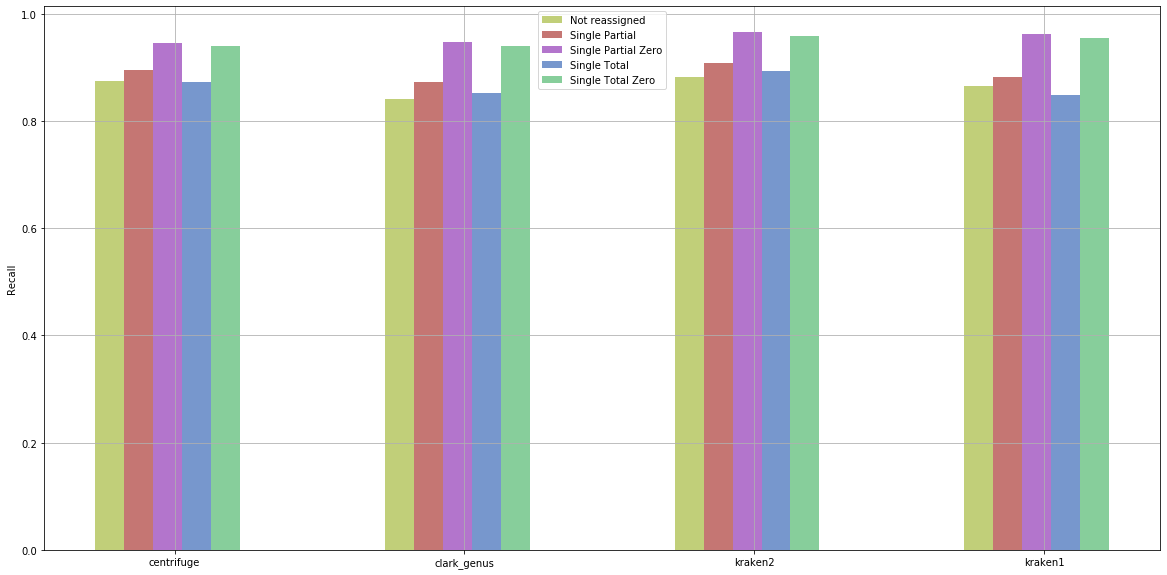

In [114]:
ReacllPlot(df)